<a href="https://colab.research.google.com/github/poorvis885/StockPrice-prediction/blob/main/Real_Time_Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed


Price                           Close
Ticker                           AAPL
Datetime                             
2025-03-28 19:55:00+00:00  218.014999
2025-03-28 19:56:00+00:00  217.970001
2025-03-28 19:57:00+00:00  217.949997
2025-03-28 19:58:00+00:00  217.884995
2025-03-28 19:59:00+00:00  217.880005


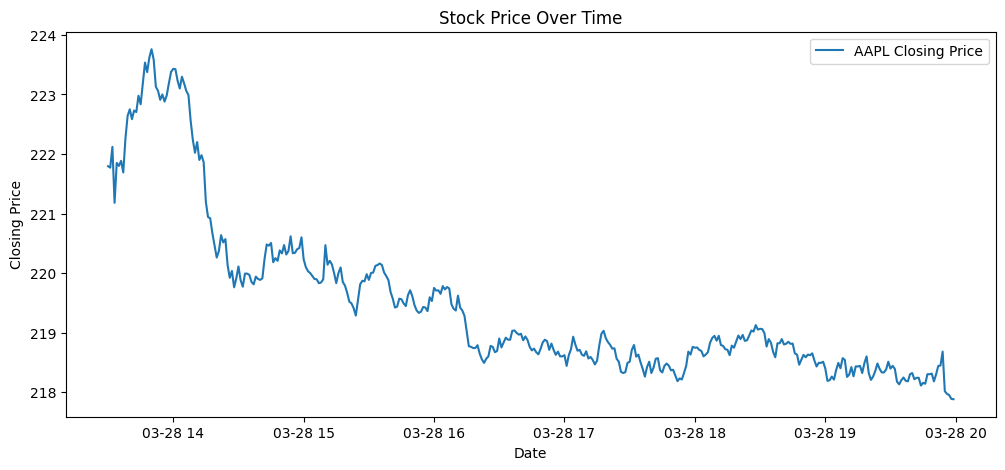

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency min will be used.
  self._init_dates(dates, freq)


ARIMA RMSE: 0.49


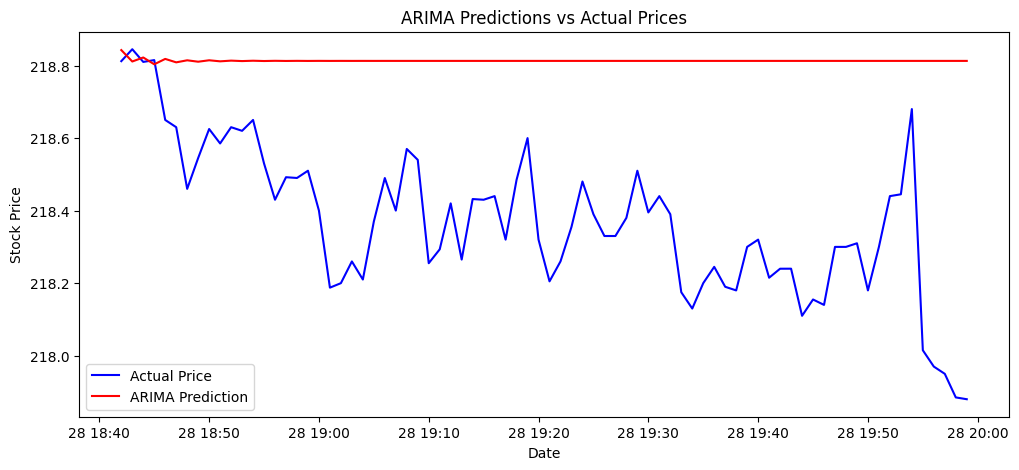

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 127ms/step - loss: 0.0342 - val_loss: 0.0144
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0079 - val_loss: 0.0013
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0050 - val_loss: 0.0042
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.0036 - val_loss: 0.0039
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.0029 - val_loss: 0.0015
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.0024 - val_loss: 0.0015
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.0025 - val_loss: 9.8647e-04
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0022 - val_loss: 8.4407e-04
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 0.0023 - val_loss: 8.1198e-04
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - loss: 0.0025 - val_loss: 7.9453e-04
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 168ms/step


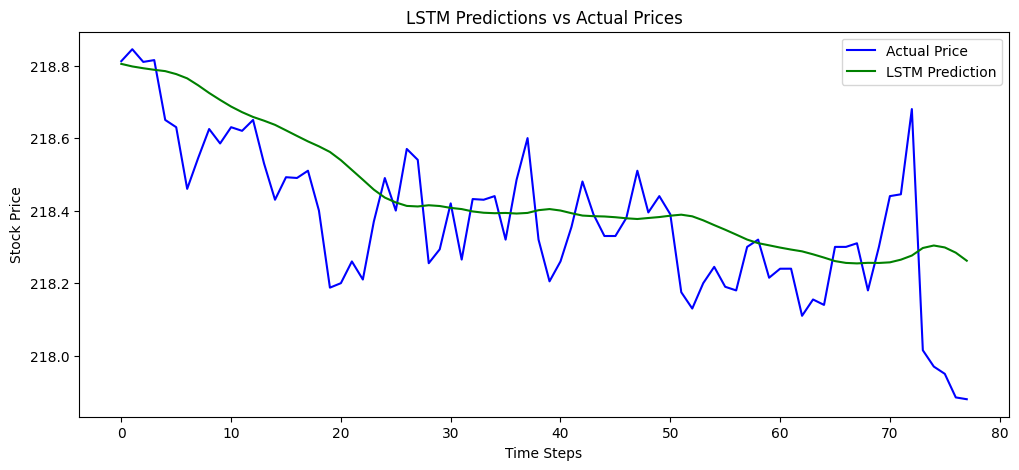

[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Predicted Next Minute Price: 218.24


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Predicted Next Minute Price: 218.24


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Predicted Next Minute Price: 218.24


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Predicted Next Minute Price: 218.24


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Predicted Next Minute Price: 218.24


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Predicted Next Minute Price: 218.24


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Predicted Next Minute Price: 218.24


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import time

# Step 1: Fetch Live Stock Data

def get_live_data(ticker, interval="1m", period="1d"):
    df = yf.download(ticker, interval=interval, period=period)
    df = df[['Close']]
    return df

ticker = "AAPL"  # Apple Stock

df = get_live_data(ticker)
print(df.tail())

# Step 2: Data Visualization
plt.figure(figsize=(12, 5))
plt.plot(df, label=f"{ticker} Closing Price")
plt.title("Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.show()

# Step 3: ARIMA Model for Time Series Forecasting
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

arima_model = ARIMA(train, order=(5,1,0))  # (p,d,q) parameters
a_model = arima_model.fit()
forecast = a_model.forecast(len(test))

# Evaluating ARIMA
arima_rmse = np.sqrt(mean_squared_error(test, forecast))
print(f"ARIMA RMSE: {arima_rmse:.2f}")

# Plot ARIMA Predictions vs Actual Prices
plt.figure(figsize=(12, 5))
plt.plot(test.index, test, label='Actual Price', color='blue')
plt.plot(test.index, forecast, label='ARIMA Prediction', color='red')
plt.title("ARIMA Predictions vs Actual Prices")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

# Step 4: LSTM Model for Prediction
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(df)

X, y = [], []
lookback = 60  # Using last 60 minutes for prediction
for i in range(lookback, len(data_scaled)):
    X.append(data_scaled[i-lookback:i, 0])
    y.append(data_scaled[i, 0])
X, y = np.array(X), np.array(y)

X_train, X_test, y_train, y_test = X[:train_size-lookback], X[train_size-lookback:], y[:train_size-lookback], y[train_size-lookback:]

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# LSTM Model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=False),
    Dropout(0.2),
    Dense(units=1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# LSTM Predictions
lstm_predictions = model.predict(X_test)
lstm_predictions = scaler.inverse_transform(lstm_predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot LSTM Predictions vs Actual Prices
plt.figure(figsize=(12, 5))
plt.plot(range(len(y_test_actual)), y_test_actual, label='Actual Price', color='blue')
plt.plot(range(len(lstm_predictions)), lstm_predictions, label='LSTM Prediction', color='green')
plt.title("LSTM Predictions vs Actual Prices")
plt.xlabel("Time Steps")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

# Real-Time Prediction Loop
def real_time_prediction(model, ticker, scaler, lookback=60):
    while True:
        live_data = get_live_data(ticker, interval="1m", period="1d")
        latest_data = live_data[-lookback:].values.reshape(-1, 1)
        latest_scaled = scaler.transform(latest_data)
        latest_scaled = np.reshape(latest_scaled, (1, lookback, 1))

        prediction = model.predict(latest_scaled)
        predicted_price = scaler.inverse_transform(prediction.reshape(-1, 1))
        print(f"Predicted Next Minute Price: {predicted_price[0][0]:.2f}")

        time.sleep(60)  # Wait for 1 minute before fetching new data

# Start Real-Time Prediction
real_time_prediction(model, ticker, scaler)
